# 导入依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import rcParams
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings("ignore")

# 数据处理

In [3]:
boston = load_boston()
boston_data = boston['data']
boston_target = boston['target']
boston_names = boston['feature_names']
print('boston数据集数据的形状为：', boston_data.shape)
print('boston数据集标签的形状为：', boston_target.shape)
print('boston数据集特征名的形状为：', boston_names.shape)

boston数据集数据的形状为： (506, 13)
boston数据集标签的形状为： (506,)
boston数据集特征名的形状为： (13,)


# 划分数据集

In [4]:
boston_data_train, boston_data_test, boston_target_train, boston_target_test = train_test_split(boston_data,
                                                                                                boston_target,
                                                                                                test_size=0.2,
                                                                                                random_state=125)
print('boston训练集数据的形状为：', boston_data_train.shape)
print('boston训练集标签的形状为：', boston_target_train.shape)
print('boston测试集数据的形状为：', boston_data_test.shape)
print('boston测试集标签的形状为：', boston_target_test.shape)

boston训练集数据的形状为： (404, 13)
boston训练集标签的形状为： (404,)
boston测试集数据的形状为： (102, 13)
boston测试集标签的形状为： (102,)


# 离差标准化

In [5]:
# 生成规则
std_scaler = StandardScaler().fit(boston_data_train)
# 将规则应用于训练集
boston_train_scaler = std_scaler.transform(boston_data_train)
# 将规则应用于测试集
boston_test_scaler = std_scaler.transform(boston_data_test)
print('boston标准差标准化后训练集数据的方差为：', np.var(boston_train_scaler))
print('boston标准差标准化后训练集数据的均值为：', np.mean(boston_train_scaler))
print('boston标准差标准化后测试集数据的方差为：', np.var(boston_test_scaler))
print('boston标准差标准化后测试集数据的均值为：', np.mean(boston_test_scaler))

boston标准差标准化后训练集数据的方差为： 0.9999999999999987
boston标准差标准化后训练集数据的均值为： 1.6075826461670583e-15
boston标准差标准化后测试集数据的方差为： 0.9825032888647146
boston标准差标准化后测试集数据的均值为： -0.0316340206694563


# PCA降维

In [6]:
# 生成规则
pca = PCA(n_components=5).fit(boston_train_scaler)
# 将规则应用于训练集
boston_train_pca = pca.transform(boston_train_scaler)
# 将规则应用于测试集
boston_test_pca = pca.transform(boston_test_scaler)
print('降维后boston数据集数据测试集的形状为：', boston_train_pca.shape)
print('降维后boston数据集数据训练集的形状为：', boston_test_pca.shape)

降维后boston数据集数据测试集的形状为： (404, 5)
降维后boston数据集数据训练集的形状为： (102, 5)


# 训练线性回归模型

In [7]:
clf = LinearRegression().fit(boston_data_train, boston_target_train)
print('建立的LinearRegression模型为：', '\n', clf)

建立的LinearRegression模型为： 
 LinearRegression()


# 评估预测结果

In [8]:
y_pred = clf.predict(boston_data_test)
print('预测前20个结果为：', '\n', y_pred[:20])

预测前20个结果为： 
 [21.16289134 19.67630366 22.02458756 24.61877465 14.44016461 23.32107187
 16.64386997 14.97085403 33.58043891 17.49079058 25.50429987 36.60653092
 25.95062329 28.49744469 19.35133847 20.17145783 25.97572083 18.26842082
 16.52840639 17.08939063]


In [9]:
print('Boston数据线性回归模型的平均绝对误差为：', mean_absolute_error(boston_target_test, y_pred))
print('Boston数据线性回归模型的均方误差为：', mean_squared_error(boston_target_test, y_pred))
print('Boston数据线性回归模型的中值绝对误差为：', median_absolute_error(boston_target_test, y_pred))
print('Boston数据线性回归模型的可解释方差值为：', explained_variance_score(boston_target_test, y_pred))
print('Boston数据线性回归模型的R方值为：', r2_score(boston_target_test, y_pred))

Boston数据线性回归模型的平均绝对误差为： 3.3775517360082112
Boston数据线性回归模型的均方误差为： 31.150517390315706
Boston数据线性回归模型的中值绝对误差为： 1.778899642541944
Boston数据线性回归模型的可解释方差值为： 0.7105475650096653
Boston数据线性回归模型的R方值为： 0.7068961686076831


# 绘制图像

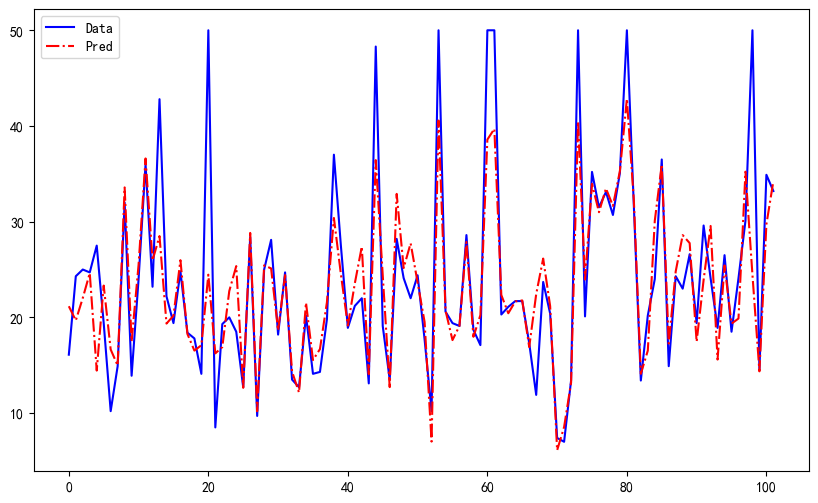

In [10]:
rcParams['font.sans-serif'] = 'SimHei'
fig = plt.figure(figsize=(10, 6))
plt.plot(range(boston_target_test.shape[0]), boston_target_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(range(boston_target_test.shape[0]), y_pred, color="red", linewidth=1.5, linestyle="-.")
plt.legend(['Data', 'Pred'])
plt.savefig('../images/boston.png')
plt.show()